<a href="https://colab.research.google.com/github/yanirasilva-star/ICD/blob/main/Data_Lead_TG1_final_GRUPO3_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introducción A Ciencia De Datos Y Machine Learning Con Python**

**Integrantes:**



*   Arizaba Garcia Topacio

*   Silva Ruiz Yanira
*   Vega castro Angie


*   Vasquez Milian Andy


**Profesor:** Luis Jose Zapata Bobadilla

**Universidad de Piura**

# **Pregunta**: *¿Cuál es la influencia de la tasa de interés de referencia en la dinámica de la inflación en el corto plazo en el Perú?* 📈
___

En el Perú, la política monetaria juega un rol central en la estabilidad de precios, siendo la Tasa de Política Monetaria (TPM) el principal instrumento utilizado por el Banco Central de Reserva del Perú (BCRP) para influir en la dinámica de la inflación. A través de cambios en la TPM, el BCRP busca regular las condiciones de liquidez del sistema financiero, lo cual se refleja en variables como la tasa de depósitos overnight, el saldo de Certificados de Depósito del BCRP (CDBCR) y las colocaciones en el mercado de dinero. Estas herramientas, junto con la administración de los depósitos del sector público, permiten transmitir los efectos de la política monetaria hacia el crédito, el ahorro y, en última instancia, hacia el comportamiento de la inflación medida por la variación mensual del Índice de Precios al Consumidor (IPC).

El análisis de estas variables mediante boxplots permite observar su comportamiento histórico, identificar la presencia de valores atípicos y evaluar la dispersión de los datos, lo cual resulta clave para comprender cómo se han ajustado los instrumentos de política monetaria frente a distintos escenarios económicos. Con ello, se busca responder la pregunta central de este trabajo: ¿cuál es la influencia de la tasa de interés de referencia en la dinámica de la inflación en el corto plazo en el Perú?

## **Información antes de la limpieza**

### **1. Definición del periodo y variables**

 **PERIÓDO**
* Periodo inicial: **Enero del 2013**
* Periodo final: **Agosto del 2025**

**VARIABLES**
1. PN38705PM: Inflación mensual (IPC)
2. PD04722MM: Tasa de interés de referencia (TIR)
3. PN07819NM: Tasa de interés interbancaria promedio
4.  PN06522TM: repo de valores saldo
5. PN06534TM: depósitos públicos saldo
6. PN06502OM: CD BCRP - Total - Saldo
7. PN06503OM: CD BCRP - Tasa de ínteres - Saldo
8. PN07150NM: Depositos overnight BCRP (promedio diario) - Empresas Bancarias (miles S/)
9. PD04724MM: Tasa de los Depósitos Overnight en MN

Entre ellas, la inflación (IPC) y la tasa de referencia son las variables principales.
Las demás funcionan como canales de transmisión (tasa interbancaria, depósitos overnight) o instrumentos operativos (repos, CDBCR, depósitos).



**Librerias**
  `pandas`, `numpy`y `requests` para hacer petición a la web.

**Formato:**  se usa `json  `,es la manera más práctica y estándar de recibir la información y convertirla en objetos de Python para trabajar con ellos.

Realiza una solicitud GET a la API de BCRP utilizando `requests.get()`
Comprueba si la solicitud fue exitosa (código de estado 200).
Si la operación es correcta, analiza la respuesta JSON en un diccionario de Python y la almacena en la datavariable. De lo contrario, muestra un mensaje de error.





---



In [ ]:
# Primero, importamos las librerías que necesitaremos
import requests  # La librería estándar en Python para hacer peticiones a la web
import pandas as pd
import numpy as np

# 1. Definimos los parámetros de nuestra consulta
codigos = 'PN38705PM-PD04722MM-PN07819NM-PN06522TM-PN06534TM-PN06502OM-PN06503OM-PN07150NM-PD04724MM'
formato = 'json' # Pedimos los datos en formato JSON
periodo_inicial = '2013-01'
periodo_final = '2025-08'

# 2. Construimos la URL completa
url = f"https://estadisticas.bcrp.gob.pe/estadisticas/series/api/{codigos}/{formato}/{periodo_inicial}/{periodo_final}"

# 3. Hacemos la petición GET a la web del BCRP
response = requests.get(url)

# 4. Verificamos que la petición fue exitosa (un código 200 significa que todo salió bien)
if response.status_code == 200:
    print("¡Conexión exitosa con el API del BCRP!")
    # Convertimos la respuesta a un formato de diccionario de Python
    data = response.json()
else:
    print(f"Error al conectar con el API. Código de estado: {response.status_code}")
    data = None

¡Conexión exitosa con el API del BCRP!


### **2.Inspección de la estructura de datos sin procesar:**

Antes de convertir los datos a un formato estructurado como un DataFrame de Pandas, inspeccionamos los datos sin procesar recibidos de la API de BCRP para comprender su organización. Esto se realizó imprimiendo las dos primeras y la última entrada de la  lista "periods"  dentro del  objeto "data"  . Esto nos permitió ver:

*    El formato de la información de fecha (que  más tarde se convertiría en la  columna **'Fecha'**  en nuestro DataFrame).
*  Cómo se almacenan   los valores de cada variable (que más tarde llenarían columnas como  **'Tasa\_Ref (%)'** ,  **'IPC'** , etc.) en una lista para cada período.
*    El orden en que aparecen estos valores de variable  en la lista para cada período, lo cual fue crucial para  extraer y etiquetar correctamente los datos en las columnas apropiadas del DataFrame.

Este paso confirmó que los datos están estructurados como  una lista de períodos, donde cada período contiene una fecha y una lista de valores de variables correspondientes en  un orden consistente, preparándonos para crear nuestro DataFrame estructurado.

In [ ]:
# Miremos los datos de los primeros dos periodos para entender la estructura
# [tasa de interés de ref, tasa de depósitos overnight, CDBCR total saldo, CDBCR saldo tasa de interés, repos de valores, depósitos públicos, depósitos overnight BCR,  tasa de interés interbancaria, IPC]
if data:
    print(data['periods'][0])
    print(data['periods'][1])
    print(data['periods'][-1])

{'name': 'Ene.2013', 'values': ['4.25', '3.45', '36762.4', '4.053', '0', '0', '367807', '4.1518', '76.3701370802442']}
{'name': 'Feb.2013', 'values': ['4.25', '3.45', '36200.2', '4.03', '0', '0', '47590', '4.2008', '76.301403956872']}
{'name': 'Ago.2025', 'values': ['4.5', '2.5', '43991.9', '4.2065169497112', '7306.947803', '4024.9', '78929.5483870968', '4.5079', '115.586828']}


### **3. Estructuración de los datos en un DataFrame:**

Este bloque de código se centra en convertir los datos sin procesar , en formato de lista de diccionarios, en  un DataFrame estructurado de Pandas.

Así es como funciona:

* **Inicialización de listas:**  Se crean listas vacías para cada variable (p. ej.,  `fechas` ,  `tir` ,  `ipc` ) para almacenar temporalmente los datos extraídos.  
*  **Iteración por períodos:**  El código recorre cada  `period`  en la  lista `data['periods']`  obtenida de la API de BCRP.  
*  **Extracción de datos:**  Dentro del bucle:  
    *  Se extrae    la fecha ( `period['name']` ) y se agrega a la  lista `fechas` .
    *  Se extrae   la lista de valores de todas las variables ( `period['values']` ).
    *    Para cada variable, se accede al valor correspondiente desde la  lista `valores`  usando su índice (según el orden de los códigos  en la llamada a la API).
    *    El valor extraído se convierte a un  `float`  si es un número válido. Si el valor es 'nd' (que indica no disponible), se reemplaza con  `np.nan`  (no es un número) para representar los datos faltantes en el DataFrame .
    *    Estos valores procesados ​​se añaden a sus respectivas listas.
*  **Creación del DataFrame:**  Después de procesar todos los períodos,   se crea un diccionario `datos_para_df` . Las claves de este diccionario son los nombres de columna deseados para el DataFrame (por ejemplo, 'Fech a', 'Tasa\_Ref (%)'), y los valores son las listas  que contienen los datos extraídos y procesados ​​para cada variable.  
*  **Relleno del DataFrame:** Finalmente,  se crea   un DataFrame de pandas  `df_bcrp` a partir del diccionario `datos_para_df`  . La  línea `display(df_bcrp.head())`  muestra las primeras filas del DataFrame recién creado, lo que permite una rápida verificación de  la estructura y los datos.

Este proceso transforma eficazmente los datos sin procesar de la API en un formato tabular limpio, listo para su posterior análisis y visualización en los  pasos posteriores.

In [ ]:
if data:
    # Creamos listas vacías
    fechas = []
    tir = []
    tover = []
    cdbcr_total = []
    cdbcr_tir = []
    repos_valores = []
    depositos_publicos = []
    depositos_overnight = []
    interbancaria = []
    ipc = []
    ipc_variacion = [np.nan]  # Empezamos ipc_variacion con NaN para el primer mes

    # Iteramos sobre los periodos en los datos del BCRP
    for periodo in data['periods']:
        fechas.append(periodo['name'])

        # Los valores vienen en el mismo orden en que pusiste los códigos en la URL:
        # PN38705PM - PD04722MM - PN07839NM - PN06525TM - PN06534TM
        valores = periodo['values']

        # Tasa de interés de referencia
        tir.append(float(valores[0]) if valores[0] != 'n.d.' else np.nan)
        # Depositos overnight
        tover.append(float(valores[1]) if valores[1] != 'n.d.' else np.nan)
        # CDBCR total saldo
        cdbcr_total.append(float(valores[2]) if valores[2] != 'n.d.' else np.nan)
        # CDBCR saldo tasa de interés
        cdbcr_tir.append(float(valores[3]) if valores[3] != 'n.d.' else np.nan)
        # Repos (saldo)
        repos_valores.append(float(valores[4]) if valores[4] != 'n.d.' else np.nan)
        # Depósitos públicos (saldo)
        depositos_publicos.append(float(valores[5]) if valores[5] != 'n.d.' else np.nan)
        # Depositos overnight BCR
        depositos_overnight.append(float(valores[6]) if valores[6] != 'n.d.' else np.nan)
        # Tasa interbancaria promedio
        interbancaria.append(float(valores[7]) if valores[7] != 'n.d.' else np.nan)
        # IPC
        ipc.append(float(valores[8]) if valores[8] != 'n.d.' else np.nan)

    # Calculamos la variación porcentual mensual del IPC
    for i in range(1, len(ipc)):
        if np.isnan(ipc[i]) or np.isnan(ipc[i-1]):
            ipc_variacion.append(np.nan)
        else:
            variacion = ((ipc[i] - ipc[i-1]) / ipc[i-1]) * 100
            ipc_variacion.append(variacion)

    # Aseguramos que todas las listas tienen la misma longitud
    max_len = len(fechas)  # Esto debería ser el tamaño correcto
    while len(ipc_variacion) < max_len:
        ipc_variacion.append(np.nan)  # Rellenamos con NaN si es necesario

    # Construimos el DataFrame
    datos_para_df = {
        'Fecha': fechas,
        'Tasa_Ref (%)': tir,
        'Tasa_Depositos_Overnight (%)': tover,
        'CDBCR_Total_Saldo (S/ millones)': cdbcr_total,
        'CDBCR_Saldo_TIR (%)': cdbcr_tir,
        'Repos_Valores (S/ millones)': repos_valores,
        'Depositos_Publicos_Saldo (S/ millones)': depositos_publicos,
        'Depositos_Overnight_BCR (S/ miles)': depositos_overnight,
        'Tasa_Interbancaria (%)': interbancaria,
        'IPC': ipc,
        'Variación_Porcentual_IPC': ipc_variacion,
    }

    df_bcrp = pd.DataFrame(datos_para_df)

    print("DataFrame creado exitosamente:")
    display(df_bcrp.head())
else:
    print("No se pudieron cargar los datos para crear el DataFrame.")

DataFrame creado exitosamente:


,Fecha,Tasa_Ref (%),Tasa_Depositos_Overnight (%),CDBCR_Total_Saldo (S/ millones),CDBCR_Saldo_TIR (%),Repos_Valores (S/ millones),Depositos_Publicos_Saldo (S/ millones),Depositos_Overnight_BCR (S/ miles),Tasa_Interbancaria (%),IPC,Variación_Porcentual_IPC
0,Ene.2013,4.25,3.45,36762.4,4.053,0.0,0.0,367807.0,4.1518,76.370137,NaN
1,Feb.2013,4.25,3.45,36200.2,4.030,0.0,0.0,47590.0,4.2008,76.301404,-0.090000
2,Mar.2013,4.25,3.45,36034.7,3.960,0.0,0.0,201773.0,4.2404,76.994851,0.908826
3,Abr.2013,4.25,3.45,37175.0,3.970,0.0,0.0,122430.0,4.2005,77.189176,0.252386
4,May.2013,4.25,3.45,33493.0,3.860,0.0,0.0,23520.0,4.2542,77.338603,0.193586


###**4. Información descriptiva de la data**

In [ ]:
df_bcrp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Fecha                                   152 non-null    object 
 1   Tasa_Ref (%)                            152 non-null    float64
 2   Tasa_Depositos_Overnight (%)            152 non-null    float64
 3   CDBCR_Total_Saldo (S/ millones)         152 non-null    float64
 4   CDBCR_Saldo_TIR (%)                     152 non-null    float64
 5   Repos_Valores (S/ millones)             152 non-null    float64
 6   Depositos_Publicos_Saldo (S/ millones)  152 non-null    float64
 7   Depositos_Overnight_BCR (S/ miles)      152 non-null    float64
 8   Tasa_Interbancaria (%)                  152 non-null    float64
 9   IPC                                     152 non-null    float64
 10  Variación_Porcentual_IPC                151 non-null    float6

In [ ]:
df_bcrp.describe()

,Tasa_Ref (%),Tasa_Depositos_Overnight (%),CDBCR_Total_Saldo (S/ millones),CDBCR_Saldo_TIR (%),Repos_Valores (S/ millones),Depositos_Publicos_Saldo (S/ millones),Depositos_Overnight_BCR (S/ miles),Tasa_Interbancaria (%),IPC,Variación_Porcentual_IPC
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,1.520000e+02,152.000000,152.000000,151.000000
mean,3.797697,2.486513,33746.351974,3.846919,5568.983261,2801.742105,8.239607e+05,3.827607,94.137640,0.275417
std,1.932369,1.348496,14455.399160,1.769391,4366.903163,2167.146173,1.257515e+06,1.936193,12.001968,0.343484
min,0.250000,0.150000,12757.200000,0.364835,0.000000,0.000000,2.352000e+04,0.110600,76.301404,-0.469245
25%,2.750000,1.500000,25491.550000,2.800000,1900.000000,1154.750000,2.531599e+05,2.752650,85.399373,0.063155
50%,4.000000,2.500000,30080.050000,3.870000,5054.266810,2500.100000,4.366190e+05,3.963500,91.465364,0.225030
75%,4.500000,3.250000,41028.975000,4.666141,8485.396000,4158.825000,7.834652e+05,4.533500,104.685598,0.423334
max,7.750000,5.250000,81435.000000,7.571590,15654.446000,7044.400000,8.106778e+06,7.761200,115.923300,1.482660


 **Información General:**

 Los principales hallazgos del análisis, basado en las funciones `df_bcrp.info()` y `df_bcrp.describe().`

El DataFrame contiene 173 observaciones y 10 columnas.

**Estadísticas Descriptivas Clave:**

* **Tasa de Referencia (Tasa_Ref %):** Muestra variabilidad esperada con un rango de 0.25% a 7.75% (media de 3.83%), reflejando ajustes de política monetaria.

* **IPC**: Presenta un rango amplio (70.95% a 115.92%, media de 91.68%) con una desviación estándar notable (13.06), indicando fluctuaciones en la inflación, incluyendo picos.

* **Canales de Transmisión e Instrumentos Operativos:** Tasas como la interbancaria y de depósitos overnight, así como los saldos de repos y CDBCR, exhiben mayor volatilidad y rangos amplios, especialmente durante períodos de crisis, lo que sugiere su uso activo por parte del BCRP.
Correlaciones: Existe una alta correlación entre la Tasa de Referencia y otras tasas de interés (interbancaria, depósitos overnight, y TIR de CDBCR), confirmando su rol en la transmisión de la política monetaria. La correlación positiva entre Repos y el IPC podría indicar el uso de liquidez en respuesta a presiones inflacionarias o viceversa.
Conclusión:

El análisis descriptivo revela que el DataFrame ``df_bcrp contiene información relevante sobre la política monetaria y la inflación en Perú.

###**5.Limpieza de data**

**5.1 Eliminar datos faltanes:**
Este bloque de código se encarga de la limpieza de datos, específicamente eliminando filas que contienen valores faltantes (NaN) en cualquier columna del DataFrame `df_bcrp`.


* `df_bcrp.dropna(inplace=True)`Esta línea elimina cualquier fila del DataFrame df_bcrpque contenga al menos un valor faltante ( NaN).
* `El inplace=True`Modifica el DataFrame directamente sin crear uno nuevo.
`df_bcrp.info()`:Esta línea muestra luego un resumen conciso del DataFrame modificado.
El resultado `df_bcrp.info()`después de la ejecución `dropna()`muestra la estructura del DataFrame, incluyendo el número de entradas (filas) y el recuento de valores no nulos en cada columna. Si el número de entradas es menor que el original (que era 188 antes de este paso, como se muestra en el resultado del paso anterior `df_bcrp.info()`), significa que se eliminaron correctamente algunas filas con valores faltantes.






In [ ]:
# Eliminar las filas con valores faltantes en cualquier columna
df_bcrp.dropna(inplace=True)

# Verificar nuevamente el estado del DataFrame
df_bcrp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, 1 to 151
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Fecha                                   151 non-null    object 
 1   Tasa_Ref (%)                            151 non-null    float64
 2   Tasa_Depositos_Overnight (%)            151 non-null    float64
 3   CDBCR_Total_Saldo (S/ millones)         151 non-null    float64
 4   CDBCR_Saldo_TIR (%)                     151 non-null    float64
 5   Repos_Valores (S/ millones)             151 non-null    float64
 6   Depositos_Publicos_Saldo (S/ millones)  151 non-null    float64
 7   Depositos_Overnight_BCR (S/ miles)      151 non-null    float64
 8   Tasa_Interbancaria (%)                  151 non-null    float64
 9   IPC                                     151 non-null    float64
 10  Variación_Porcentual_IPC                151 non-null    float64
dty

2.2 Columnas irrelevantes

In [ ]:
df_bcrp.describe()

,Tasa_Ref (%),Tasa_Depositos_Overnight (%),CDBCR_Total_Saldo (S/ millones),CDBCR_Saldo_TIR (%),Repos_Valores (S/ millones),Depositos_Publicos_Saldo (S/ millones),Depositos_Overnight_BCR (S/ miles),Tasa_Interbancaria (%),IPC,Variación_Porcentual_IPC
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,1.510000e+02,151.000000,151.000000,151.000000
mean,3.794702,2.480132,33726.378146,3.845554,5605.863945,2820.296689,8.269816e+05,3.825460,94.255306,0.275417
std,1.938446,1.350680,14501.399129,1.775199,4357.619660,2162.210534,1.261146e+06,1.942455,11.953621,0.343484
min,0.250000,0.150000,12757.200000,0.364835,0.000000,0.000000,2.352000e+04,0.110600,76.301404,-0.469245
25%,2.750000,1.500000,25454.800000,2.800000,1914.266810,1200.000000,2.519598e+05,2.752600,85.531378,0.063155
50%,4.000000,2.500000,30074.200000,3.870000,5058.533619,2500.100000,4.367218e+05,3.954000,91.493350,0.225030
75%,4.500000,3.250000,41029.550000,4.677427,8485.446000,4217.450000,7.837235e+05,4.550900,104.931264,0.423334
max,7.750000,5.250000,81435.000000,7.571590,15654.446000,7044.400000,8.106778e+06,7.761200,115.923300,1.482660


2.3 Filas repetidas

In [ ]:
# Ver las filas duplicadas
duplicadas = df_bcrp[df_bcrp.duplicated()]
print(duplicadas)

Empty DataFrame
Columns: [Fecha, Tasa_Ref (%), Tasa_Depositos_Overnight (%), CDBCR_Total_Saldo (S/ millones), CDBCR_Saldo_TIR (%), Repos_Valores (S/ millones), Depositos_Publicos_Saldo (S/ millones), Depositos_Overnight_BCR (S/ miles), Tasa_Interbancaria (%), IPC, Variación_Porcentual_IPC]
Index: []


### **6. Detección de Posibles Outliers**

Este bloque de código tiene como objetivo **identificar posibles valores atípicos (outliers)** en las columnas numéricas del DataFrame `df_bcrp` utilizando el método del **Rango Intercuartílico (IQR)**.

- **`columnas_numericas = df_bcrp.select_dtypes(include=['float64', 'int64'])`**  
  Selecciona solo las columnas numéricas (`float64` o `int64`) del DataFrame `df_bcrp` y las guarda en `columnas_numericas`.  
  Esto es necesario porque el cálculo de outliers basado en IQR solo es aplicable a datos numéricos.

- **`Q1 = columnas_numericas.quantile(0.25)`**  
  Calcula el **primer cuartil (Q1)** para cada columna numérica.  
  El Q1 representa el valor por debajo del cual se encuentra el 25 % de los datos.

- **`Q3 = columnas_numericas.quantile(0.75)`**  
  Calcula el **tercer cuartil (Q3)** para cada columna numérica.  
  El Q3 representa el valor por debajo del cual se encuentra el 75 % de los datos.

- **`IQR = Q3 - Q1`**  
  Calcula el **Rango Intercuartílico (IQR)**, que es la diferencia entre Q3 y Q1.  
  El IQR mide la dispersión de la mitad central de los datos.

- **`outliers = ((columnas_numericas < (Q1 - 1.5 * IQR)) | (columnas_numericas > (Q3 + 1.5 * IQR))).sum()`**  
  Detecta los posibles outliers.  
  Se considera un rango "normal" para los datos: `[Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]`.  
  Cualquier valor fuera de este rango se considera un posible outlier.  
  La expresión genera un DataFrame con `True` donde hay un outlier y `False` en caso contrario.  
  El `.sum()` cuenta la cantidad de `True` en cada columna (cantidad de outliers).


In [ ]:
# Seleccionar solo las columnas numéricas
columnas_numericas = df_bcrp.select_dtypes(include=['float64', 'int64'])

# Calcular el IQR solo para las columnas numéricas
Q1 = columnas_numericas.quantile(0.25)
Q3 = columnas_numericas.quantile(0.75)
IQR = Q3 - Q1

# Detectar outliers
outliers = ((columnas_numericas < (Q1 - 1.5 * IQR)) | (columnas_numericas > (Q3 + 1.5 * IQR))).sum()

# Mostrar el conteo de outliers por variable
print("Cantidad de posibles outliers por variable:")
print(outliers)



Cantidad de posibles outliers por variable:
Tasa_Ref (%)                              12
Tasa_Depositos_Overnight (%)               0
CDBCR_Total_Saldo (S/ millones)           10
CDBCR_Saldo_TIR (%)                        6
Repos_Valores (S/ millones)                0
Depositos_Publicos_Saldo (S/ millones)     0
Depositos_Overnight_BCR (S/ miles)        18
Tasa_Interbancaria (%)                    11
IPC                                        0
Variación_Porcentual_IPC                   7
dtype: int64


### **7. Graficos**

### **7.1 Boxplots**



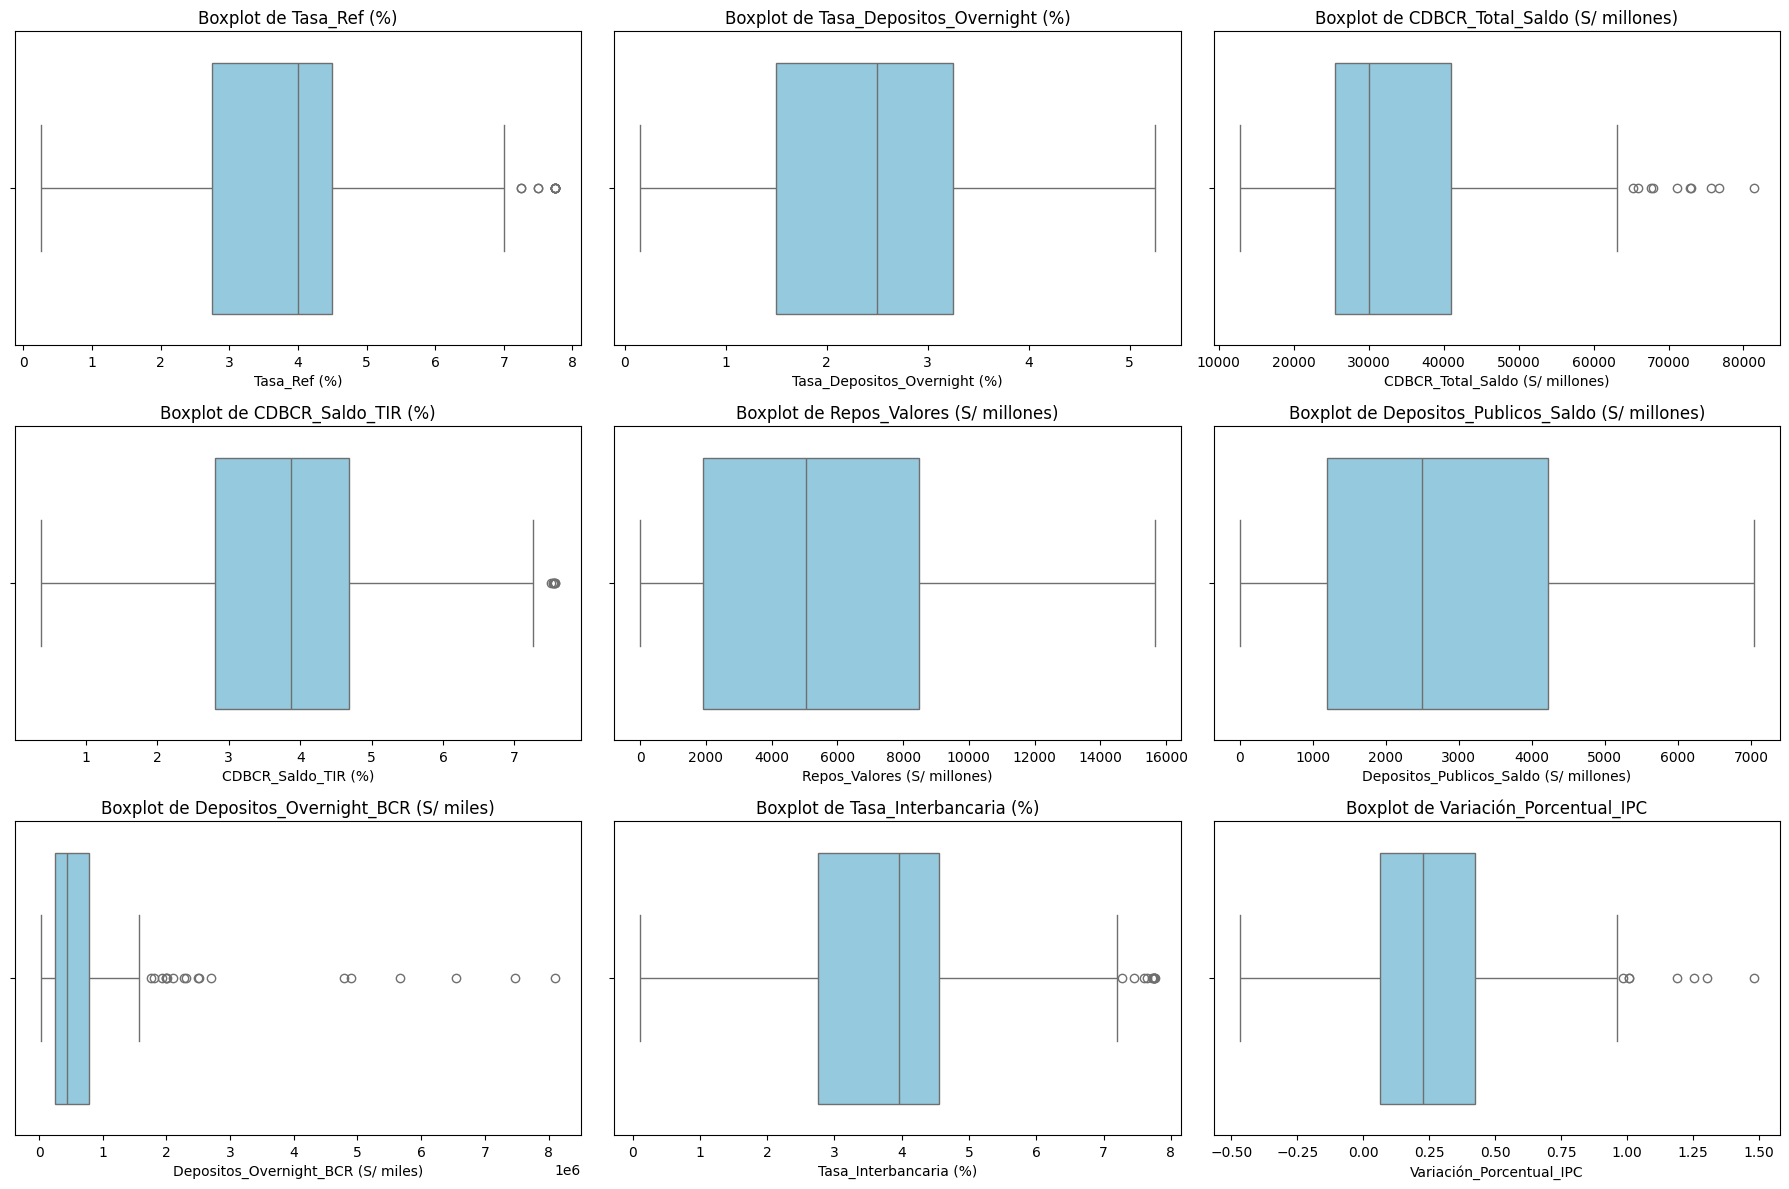

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

variables = [col for col in columnas_numericas.columns if col != "IPC"]

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.boxplot(x=df_bcrp[var], ax=axes[i], color="skyblue")  # <- azulito
    axes[i].set_title(f'Boxplot de {var}')

for j in range(len(variables), 9):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


1. Tasa de Referencia (%)

El boxplot muestra que la tasa de referencia del BCRP se ha mantenido en un rango relativamente acotado, alrededor de 3%–4% la mayor parte del tiempo, con algunos outliers en niveles más altos (7%–8%). Esto refleja que el BCRP ajusta esta tasa de manera discreta y estratégica como instrumento principal de política monetaria, elevándola en episodios de presiones inflacionarias y reduciéndola en contextos de crisis o recesión, como ocurrió en la pandemia. Su rol central es anclar las expectativas y guiar el resto de tasas de la economía.

2. Tasa de Depósitos Overnight (%)

Este boxplot revela una dispersión similar a la de la tasa de referencia, aunque con mayor variabilidad en los extremos. Al ser una tasa de muy corto plazo, suele ajustarse casi de manera inmediata a los cambios en la tasa de referencia, reflejando la efectividad del canal de transmisión de política monetaria en el segmento overnight. Su cercanía a la tasa de referencia indica que los bancos responden rápidamente a las señales del BCRP para regular su liquidez diaria.

3. CDBCR – Total Saldo (S/ millones)

En este caso, el boxplot muestra una concentración en torno a 30–40 mil millones, pero con varios outliers hacia niveles más altos (60–80 mil millones). Esto evidencia que el BCRP utiliza los Certificados de Depósito (CDBCR) como un mecanismo operativo para absorber liquidez del sistema financiero, ajustando la cantidad según las condiciones monetarias. Los valores extremos corresponden a periodos de fuerte intervención, lo que refleja que este instrumento complementa el ajuste de tasas de referencia para mantener la estabilidad monetaria.

4. CDBCR – Saldo TIR (%)

El boxplot de la tasa de interés de los CDBCR muestra que suele moverse en torno al 4%, con outliers en valores más altos. Esto confirma que la tasa de los CDBCR sigue de cerca la tasa de referencia, aunque con algunos episodios de desalineación temporal. En términos de transmisión monetaria, esta tasa es un puente entre el instrumento de política (tasa de referencia) y las condiciones de liquidez en el mercado financiero.

5. Repos de Valores (S/ millones)

Aquí observamos una dispersión amplia, con un rango central de 4–8 mil millones y algunos valores extremos hacia 15 mil millones. Esto refleja el uso de repos como herramienta del BCRP para inyectar liquidez temporal al sistema bancario, sobre todo en contextos de necesidad de financiamiento de corto plazo. Su variabilidad muestra que, si bien no marcan directamente la dirección de la política monetaria, cumplen un rol crucial para que los bancos puedan adaptarse a los cambios de tasas de referencia sin desajustes abruptos.

6. Depósitos Públicos – Saldo (S/ millones)

El boxplot presenta un rango en torno a 2–4 mil millones, con cierta dispersión. Estos depósitos constituyen otro mecanismo operativo del BCRP para absorber liquidez, ya que concentran recursos del sector público. Aunque no responden de manera directa a la tasa de referencia, complementan la política monetaria al controlar la cantidad de dinero circulante, influyendo indirectamente en las presiones inflacionarias.

7. Depósitos Overnight BCRP (S/ miles)

En este caso se observa gran dispersión y numerosos outliers que llegan hasta varios millones. Esto muestra que los bancos recurren al BCRP para colocar excedentes de liquidez de manera muy volátil. La amplitud de este rango refleja que el BCRP ajusta dinámicamente la absorción de liquidez, de acuerdo con la coyuntura. Aunque no es un canal directo hacia la inflación, sí influye en la estabilidad de las tasas de corto plazo, reforzando la transmisión de la tasa de referencia.

8. Tasa Interbancaria (%)

El boxplot refleja que esta tasa se concentra en torno al 3%–4%, con valores extremos en 7%–8%. Es clave porque constituye el mecanismo de transmisión más inmediato de la tasa de referencia: los bancos negocian fondos entre sí a este tipo de interés, y cualquier variación de la tasa de referencia se refleja de manera rápida aquí. Por ello, la tasa interbancaria es un eslabón fundamental en la cadena de transmisión de la política monetaria hacia la inflación.

9. Variación Porcentual IPC

El boxplot de la inflación (variación mensual del IPC) muestra un rango estrecho en torno a 0.2%–0.4%, con outliers hacia valores más altos, lo que refleja episodios de choques inflacionarios (como el alza de precios de alimentos y energía en 2021–2022). La relativa estabilidad en el rango central sugiere que, a pesar de esos choques, la política monetaria ha contribuido a mantener la inflación dentro o cerca del rango meta. Los outliers evidencian los límites de la política monetaria en el corto plazo frente a shocks externos.

**Información despues de la limpieza**

In [ ]:
df_bcrp.describe()

,Tasa_Ref (%),Tasa_Depositos_Overnight (%),CDBCR_Total_Saldo (S/ millones),CDBCR_Saldo_TIR (%),Repos_Valores (S/ millones),Depositos_Publicos_Saldo (S/ millones),Depositos_Overnight_BCR (S/ miles),Tasa_Interbancaria (%),IPC,Variación_Porcentual_IPC
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,1.510000e+02,151.000000,151.000000,151.000000
mean,3.794702,2.480132,33726.378146,3.845554,5605.863945,2820.296689,8.269816e+05,3.825460,94.255306,0.275417
std,1.938446,1.350680,14501.399129,1.775199,4357.619660,2162.210534,1.261146e+06,1.942455,11.953621,0.343484
min,0.250000,0.150000,12757.200000,0.364835,0.000000,0.000000,2.352000e+04,0.110600,76.301404,-0.469245
25%,2.750000,1.500000,25454.800000,2.800000,1914.266810,1200.000000,2.519598e+05,2.752600,85.531378,0.063155
50%,4.000000,2.500000,30074.200000,3.870000,5058.533619,2500.100000,4.367218e+05,3.954000,91.493350,0.225030
75%,4.500000,3.250000,41029.550000,4.677427,8485.446000,4217.450000,7.837235e+05,4.550900,104.931264,0.423334
max,7.750000,5.250000,81435.000000,7.571590,15654.446000,7044.400000,8.106778e+06,7.761200,115.923300,1.482660


### **1.TENDENCIAS**

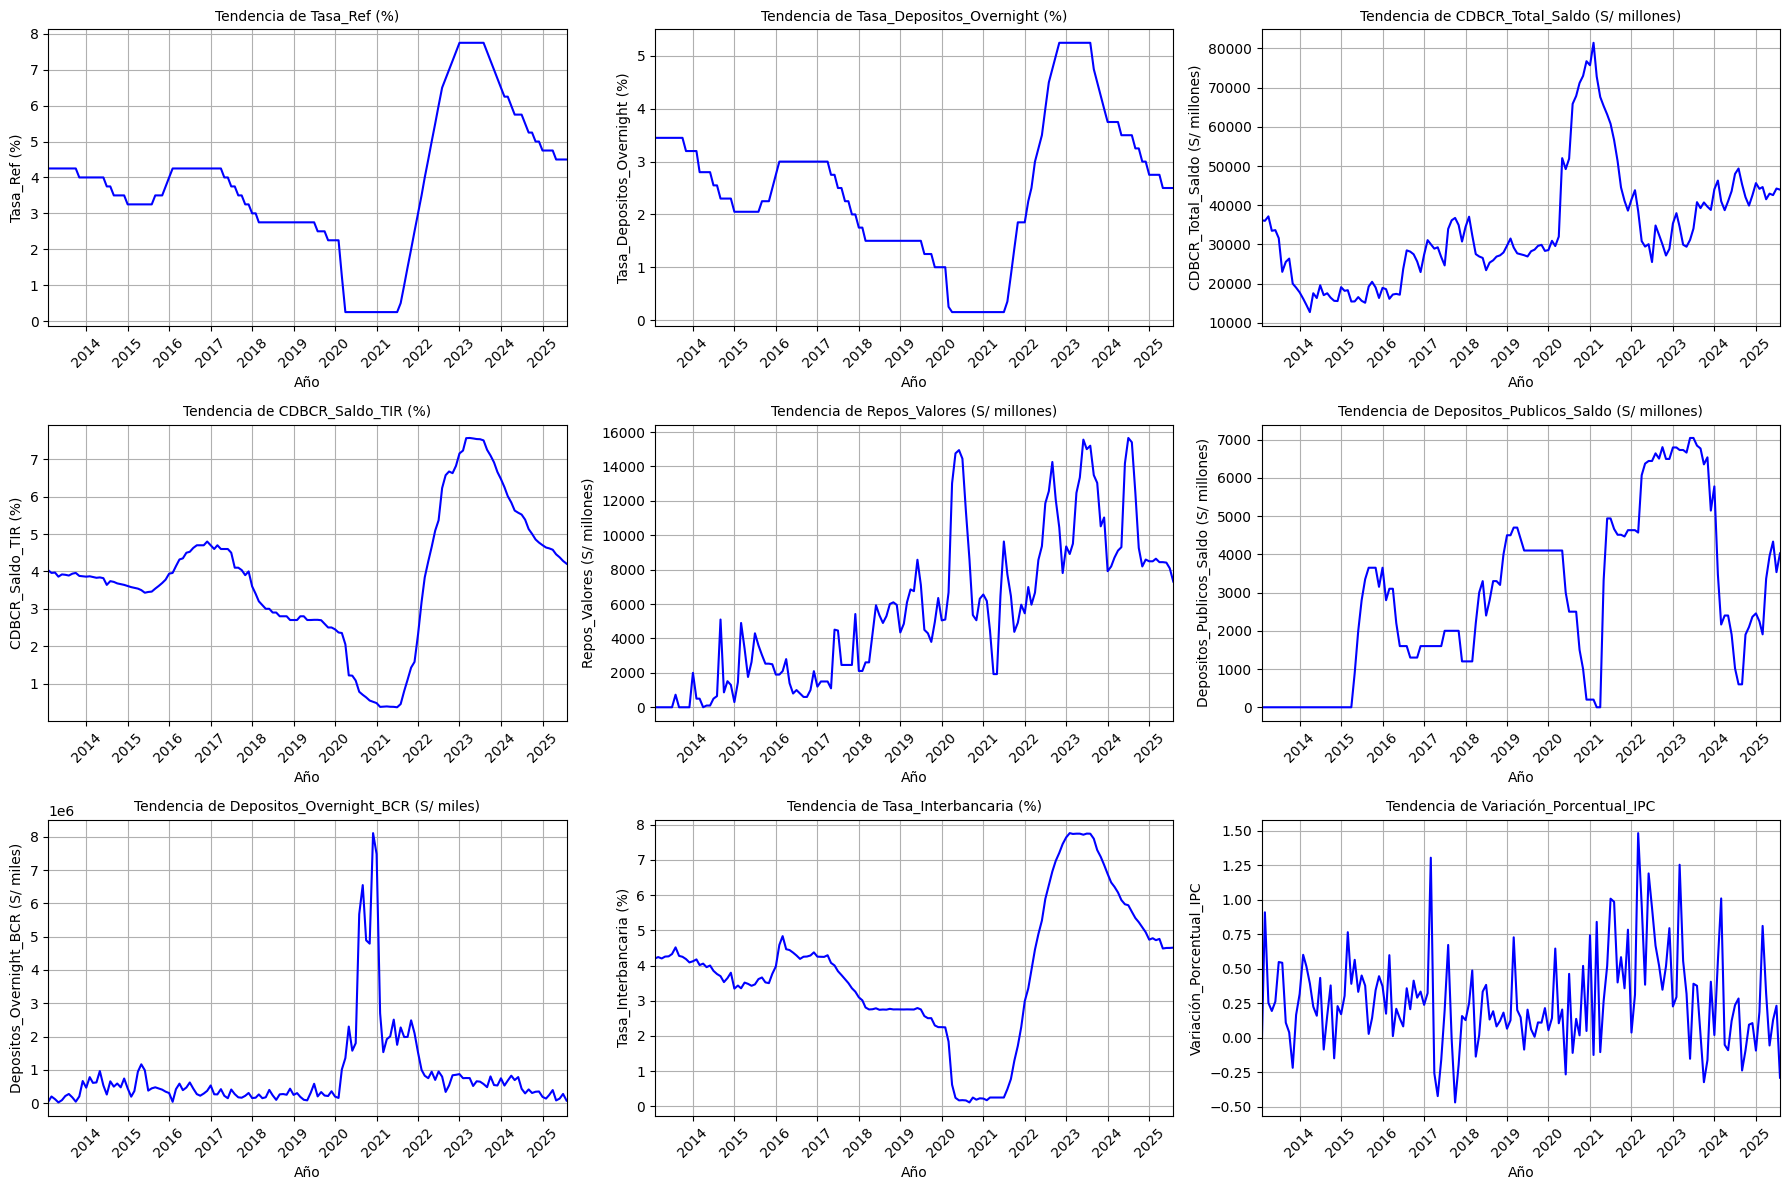

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Crear un diccionario para mapear los meses en español al formato en inglés
meses_esp = {
    'Ene': 'Jan', 'Feb': 'Feb', 'Mar': 'Mar', 'Abr': 'Apr', 'May': 'May', 'Jun': 'Jun',
    'Jul': 'Jul', 'Ago': 'Aug', 'Sep': 'Sep', 'Oct': 'Oct', 'Nov': 'Nov', 'Dic': 'Dec'
}

# Función para convertir las fechas en español al formato inglés
def convertir_mes(fecha):
    # Solo convertir si no es datetime (para evitar errores)
    if isinstance(fecha, str):
        mes, año = fecha.split('.')
        mes = meses_esp[mes]  # Reemplazar el mes en español por su equivalente en inglés
        return f'{mes}.{año}'
    return fecha  # Si ya es datetime, devolverlo tal cual

# Aplicar la función a la columna 'Fecha'
df_bcrp['Fecha'] = df_bcrp['Fecha'].apply(convertir_mes)
df_bcrp['Fecha'] = pd.to_datetime(df_bcrp['Fecha'], format='%b.%Y', errors='coerce')

# Definir las columnas numéricas de interés, EXCLUYENDO IPC
variables = [col for col in columnas_numericas.columns if col != "IPC"]

# Obtener el rango de fechas del DataFrame
fecha_min = df_bcrp['Fecha'].min()
fecha_max = df_bcrp['Fecha'].max()

# Crear figura con subplots en formato 3x3
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

# Graficar cada variable en un subplot
for i, var in enumerate(variables):
    axes[i].plot(df_bcrp['Fecha'], df_bcrp[var], linestyle='-', color='b')

    # Configurar el formato del eje X para mostrar solo el año
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    axes[i].xaxis.set_major_locator(mdates.YearLocator(1))

    # Limitar el rango del eje X
    axes[i].set_xlim([fecha_min, fecha_max])

    # Ajustes del gráfico
    axes[i].set_title(f'Tendencia de {var}', fontsize=10)
    axes[i].set_xlabel('Año')
    axes[i].set_ylabel(var)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True)

# Eliminar subplots vacíos si hay menos de 9 variables
for j in range(len(variables), 9):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


1. Tasa de Referencia (%)

Se observa una fuerte caída en 2020, cuando el BCRP redujo la tasa a mínimos históricos (0.25%) para contrarrestar los efectos de la pandemia y estimular la liquidez. Posteriormente, desde mediados de 2021 hasta 2023, la tasa se elevó de manera agresiva hasta superar 7%, en respuesta al alza inflacionaria global y local. Desde 2023, se inicia un proceso de reducción gradual, en línea con la desaceleración de la inflación.

2. Tasa de Depósitos Overnight (%)

Su comportamiento replica estrechamente a la tasa de referencia, confirmando que es un instrumento operativo de corto plazo. La caída durante la pandemia y el aumento acelerado 2021–2022 reflejan la función del BCRP de transmitir rápidamente la postura de política monetaria a la liquidez bancaria.

3. CDBCR Total Saldo (S/ millones)

Se aprecia un incremento notorio en 2020 y 2021, cuando el BCRP intensificó el uso de certificados para manejar el exceso de liquidez generado por programas de apoyo como Reactiva Perú. Posteriormente, el saldo muestra una reducción y mayor volatilidad, asociada a ajustes en la absorción de liquidez conforme se normalizaba la economía.

4. CDBCR Saldo TIR (%)

El rendimiento de los CDBCR cae fuertemente durante 2020, en línea con la baja de la tasa de referencia, y luego sube con fuerza entre 2021–2022, acompañando el endurecimiento monetario. Su tendencia confirma cómo estos títulos reflejan directamente la orientación de la política monetaria.

5. Repos con Valores (S/ millones)

La serie muestra un incremento progresivo con picos importantes entre 2020 y 2022. Durante la pandemia, el BCRP amplió las operaciones de reporte para inyectar liquidez al sistema financiero. Los picos de 2021–2022 reflejan la mayor necesidad de estabilizar la liquidez en medio de la recuperación y la volatilidad cambiaria.

6. Depósitos Públicos Saldo (S/ millones)

Presentan variaciones bruscas y escalonadas, con incrementos notables en 2020–2021 por las mayores colocaciones del sector público en el BCRP. La volatilidad refleja la interacción entre la política fiscal (mayor gasto en pandemia) y la política monetaria (absorción de liquidez vía depósitos).

7. Depósitos Overnight BCR (S/ miles)

El gráfico muestra un salto extraordinario en 2020–2021, reflejando el uso de este mecanismo para canalizar liquidez de corto plazo. Este aumento está directamente asociado a la respuesta del BCRP frente al COVID y a los programas de estímulo, que generaron exceso de liquidez en la banca. Posteriormente, el nivel cae, en línea con la normalización.

8. Tasa Interbancaria (%)

Se mueve casi en paralelo con la tasa de referencia, confirmando su rol como “tasa de transmisión” de la política monetaria. La caída en pandemia y el posterior aumento 2021–2022 replican la estrategia del BCRP. Las leves desviaciones responden a tensiones puntuales de liquidez en el sistema interbancario.

9. Variación Porcentual del IPC

El gráfico de la variación porcentual del IPC muestra una inflación mensual volátil, con la mayoría de valores dentro de ±0.5%, lo que refleja la efectividad del BCRP en mantener la estabilidad de precios en condiciones normales. Los picos al alza (superiores a 1%) corresponden a choques externos como el alza de combustibles y alimentos en 2021–2022, mientras que las caídas se asociaron a la contracción de la demanda durante el COVID-19. Según la teoría de política monetaria, la tasa de referencia actúa con rezagos, de modo que estos choques inmediatos no se corrigen al instante, pero el ajuste contractivo del BCRP en los últimos años buscó anclar expectativas y devolver la inflación al rango meta en el mediano plazo.

### **2. HISTOGRAMAS**

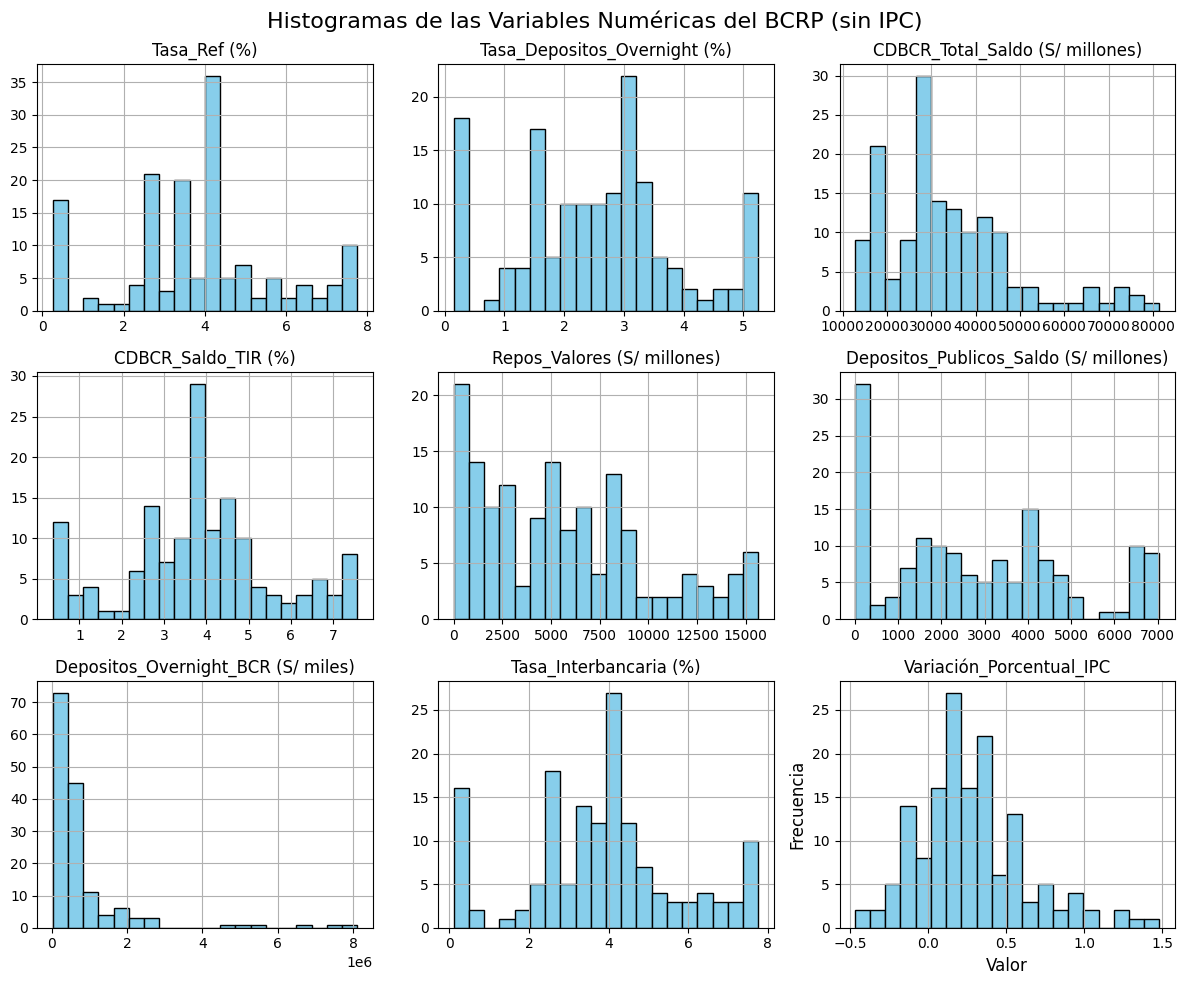

In [ ]:
import matplotlib.pyplot as plt

# Excluir las columnas 'Fecha' y 'IPC' del DataFrame
df_bcrp_sin_fecha = df_bcrp.drop(columns=['Fecha', 'IPC'])

# Generar un histograma para cada variable numérica (sin la columna 'Fecha' ni 'IPC')
df_bcrp_sin_fecha.hist(bins=20, figsize=(12, 10), color='skyblue', edgecolor='black')

# Ajustar el título y las etiquetas
plt.suptitle('Histogramas de las Variables Numéricas del BCRP (sin IPC)', fontsize=16)
plt.xlabel('Valor', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


1. Tasa de Referencia (%)

El histograma muestra mayor frecuencia en valores bajos, alrededor de 2%–4%, lo que refleja la estabilidad monetaria en la mayor parte del periodo. Sin embargo, también se observan frecuencias en niveles altos (6%–7%) correspondientes al ciclo de endurecimiento monetario 2021–2022 frente al fuerte repunte inflacionario. Los valores cercanos a 0% representan la política ultraexpansiva aplicada durante la pandemia.

2. Tasa de Depósitos Overnight (%)

La distribución es muy parecida a la de la tasa de referencia, con mayor concentración en niveles bajos y moderados. Esto confirma que este instrumento sigue de cerca la tasa de política monetaria. Los valores más bajos reflejan la etapa de expansión post-COVID, mientras que las frecuencias en torno al 4%–5% evidencian el ajuste realizado en 2021–2022 para controlar la inflación.

3. CDBCR Total Saldo (S/ millones)

El histograma muestra una fuerte concentración entre 20,000 y 40,000 millones, pero con una cola larga hacia la derecha que refleja episodios de expansión de liquidez, especialmente en 2020 con los programas de estímulo (Reactiva Perú). Esto indica que el BCRP utilizó con fuerza este instrumento en momentos críticos para absorber liquidez en exceso.

4. CDBCR Saldo TIR (%)

La mayor parte de la distribución se concentra entre 3% y 4.5%, pero también aparecen frecuencias en valores cercanos a 1% y 7%, reflejando los extremos de la política monetaria. Los valores bajos corresponden al estímulo del 2020 y los altos al ciclo contractivo del 2022, lo que muestra cómo este instrumento replica los movimientos de la tasa de referencia.

5. Repos con Valores (S/ millones)

Los repos presentan una distribución más dispersa, con gran frecuencia en valores bajos, pero también con barras altas en niveles intermedios (5,000–10,000 millones). Esto refleja que en periodos normales son poco utilizados, pero durante la pandemia y la crisis de inflación se intensificaron como mecanismo de inyección de liquidez.

6. Depósitos Públicos Saldo (S/ millones)

El histograma revela dos zonas claras: valores bajos cercanos a cero (cuando el sector público redujo depósitos para financiar gasto) y valores altos por encima de 5,000 millones, que reflejan colocaciones extraordinarias de fondos públicos en el BCRP. Esta dualidad refleja cómo la política fiscal interactúa con la política monetaria, afectando la liquidez bancaria.

7. Depósitos Overnight BCR (S/ miles)

Se observa una concentración muy marcada en valores bajos, pero con una cola larga hacia niveles extremadamente altos (superiores al millón). Esto evidencia que en periodos de normalidad los montos fueron reducidos, pero durante la pandemia y los estímulos del BCRP se registraron picos extraordinarios de liquidez que se canalizaron mediante este instrumento.

8. Tasa Interbancaria (%)

La distribución se concentra entre 2% y 4%, en línea con la tasa de referencia, confirmando su rol como tasa operativa del mercado interbancario. Sin embargo, también aparecen frecuencias en valores bajos (0%–1%) durante la pandemia y valores altos (6%–8%) durante el ciclo restrictivo 2022, lo que confirma la efectividad de la transmisión monetaria.

9. Variación Porcentual del IPC

El histograma muestra concentración alrededor de 0.2%–0.5% mensual, reflejando una inflación estable cercana a la meta de 2% anual. Sin embargo, se observan valores atípicos por encima del 1%, correspondientes a los choques inflacionarios 2021–2022 (alimentos y energía). También aparecen valores negativos, vinculados a caídas temporales de precios durante los meses más duros del COVID.

### **3.MATRIZ DE CORRELACIÓN**

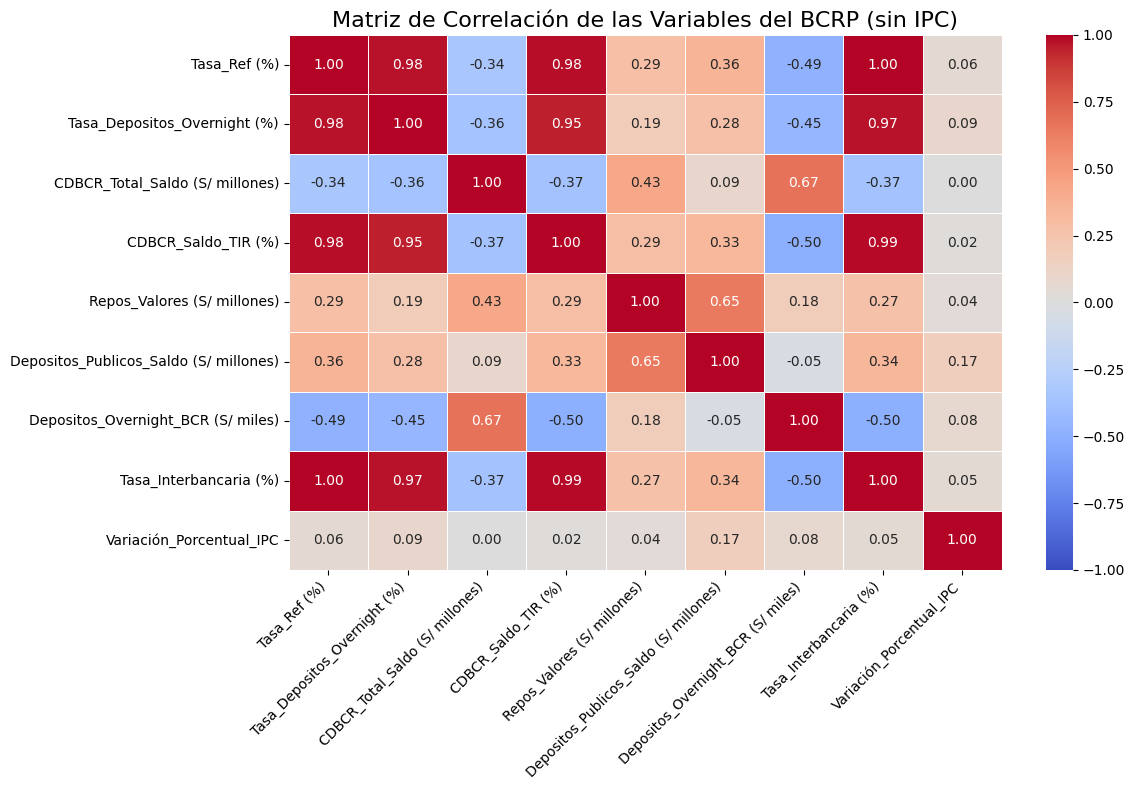

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Excluir las columnas 'Fecha' y 'IPC' para calcular la correlación solo con las variables numéricas relevantes
df_bcrp_sin_fecha = df_bcrp.drop(columns=['Fecha', 'IPC'])

# Calcular la matriz de correlación
correlacion = df_bcrp_sin_fecha.corr()

# Configuración del heatmap
plt.figure(figsize=(12, 8))  # Ajustar tamaño de la figura
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Título y etiquetas
plt.title('Matriz de Correlación de las Variables del BCRP (sin IPC)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


La matriz de correlación muestra cómo se relacionan entre sí las principales tasas de política monetaria e instrumentos de mercado que utiliza el BCRP. Los valores cercanos a 1 indican una correlación positiva muy fuerte (ambas variables se mueven juntas), mientras que los valores cercanos a -1 implican correlación negativa (cuando una sube, la otra tiende a bajar). Los colores rojos reflejan correlaciones altas y positivas, mientras que los azules representan correlaciones negativas.

                (Rojo) Correlaciones positivas fuertes (cercanas a 1)

Tasa de Referencia – Tasa Interbancaria (1.00), Depósitos Overnight (0.98), CDBCR_Saldo_TIR (0.98):
Esto confirma que la tasa de referencia del BCRP se transmite de manera inmediata al resto de tasas del sistema financiero de corto plazo, como establece la teoría de política monetaria. El BCRP busca que sus movimientos de tasa sean el ancla del sistema financiero, y la evidencia muestra que su señal se replica en la tasa interbancaria y en las operaciones con CDBCR y depósitos overnight.

Ejemplo histórico: en el COVID-19 (2020), todas estas tasas cayeron juntas al mínimo para estimular la economía.

En cambio, entre 2021–2023, subieron coordinadamente por el endurecimiento monetario frente al shock inflacionario global.

Repos – Depósitos Públicos (0.65):
Muestra que en periodos de mayor necesidad de liquidez, ambos instrumentos se han movido en paralelo. Es decir, cuando el BCRP inyecta liquidez vía repos, también suele observarse un aumento en el manejo de depósitos públicos, reflejando la gestión de liquidez de corto plazo.

                (Azul) Correlaciones negativas (cercanas a -0.5)

Tasa de Referencia / Tasa Interbancaria – Depósitos Overnight en el BCRP (-0.49 a -0.50):
Cuando la tasa de referencia es baja, los bancos prefieren mantener excedentes de liquidez en el BCRP (lo que aumenta los depósitos overnight). Por el contrario, cuando la tasa sube (política contractiva), los bancos tienden a prestar más caro en el mercado interbancario o en instrumentos como los CDBCR, reduciendo sus excedentes en depósitos overnight.

Ejemplo: en 2020 (tasa muy baja), hubo abundante liquidez en el sistema y altos saldos en depósitos overnight. Tras 2021, con el endurecimiento monetario, los saldos en el BCRP disminuyeron, mostrando cómo la política monetaria drena liquidez para contener la inflación.

                     Correlaciones débiles con el IPC

Variación Porcentual del IPC con las tasas (0.02 – 0.09):
Aquí se observa que en el corto plazo la correlación directa entre tasas de interés e inflación es muy baja. Esto no significa que no exista transmisión, sino que confirma lo que dice la teoría:

La política monetaria actúa con rezagos temporales.

Los shocks inflacionarios recientes (2021–2022) tuvieron causas externas (alimentos, combustibles, disrupciones logísticas y guerra en Ucrania) que reducen la correlación inmediata entre tasas e inflación.

El efecto de la tasa se refleja más en las expectativas y en el mediano plazo, no de forma instantánea.

### **5.CORRELACION ENTRE PARES DE VARIABLES**

In [ ]:
# Excluir las columnas 'Fecha' y 'IPC' para calcular solo las correlaciones de las variables numéricas relevantes
df_bcrp_sin_fecha = df_bcrp.drop(columns=['Fecha', 'IPC'])

# Calcular la matriz de correlación
correlacion = df_bcrp_sin_fecha.corr()

# Convertir la matriz de correlación en un formato largo (pares de variables)
correlacion_larga = correlacion.unstack()

# Filtrar los pares con correlación absoluta mayor a 0.8 (excluyendo correlación de 1 consigo misma)
correlacion_fuerte = correlacion_larga[(correlacion_larga.abs() > 0.8) & (correlacion_larga != 1)]

# Ordenar los pares de correlación de mayor a menor
correlacion_fuerte = correlacion_fuerte.sort_values(ascending=False)

# Mostrar los pares de variables más correlacionadas
print("Pares de variables con correlación más alta (sin IPC):")
print(correlacion_fuerte)


Pares de variables con correlación más alta (sin IPC):
Tasa_Ref (%)                  Tasa_Interbancaria (%)          0.997987
Tasa_Interbancaria (%)        Tasa_Ref (%)                    0.997987
CDBCR_Saldo_TIR (%)           Tasa_Interbancaria (%)          0.986241
Tasa_Interbancaria (%)        CDBCR_Saldo_TIR (%)             0.986241
Tasa_Ref (%)                  CDBCR_Saldo_TIR (%)             0.983556
CDBCR_Saldo_TIR (%)           Tasa_Ref (%)                    0.983556
Tasa_Depositos_Overnight (%)  Tasa_Ref (%)                    0.975050
Tasa_Ref (%)                  Tasa_Depositos_Overnight (%)    0.975050
Tasa_Depositos_Overnight (%)  Tasa_Interbancaria (%)          0.972138
Tasa_Interbancaria (%)        Tasa_Depositos_Overnight (%)    0.972138
CDBCR_Saldo_TIR (%)           Tasa_Depositos_Overnight (%)    0.950884
Tasa_Depositos_Overnight (%)  CDBCR_Saldo_TIR (%)             0.950884
dtype: float64


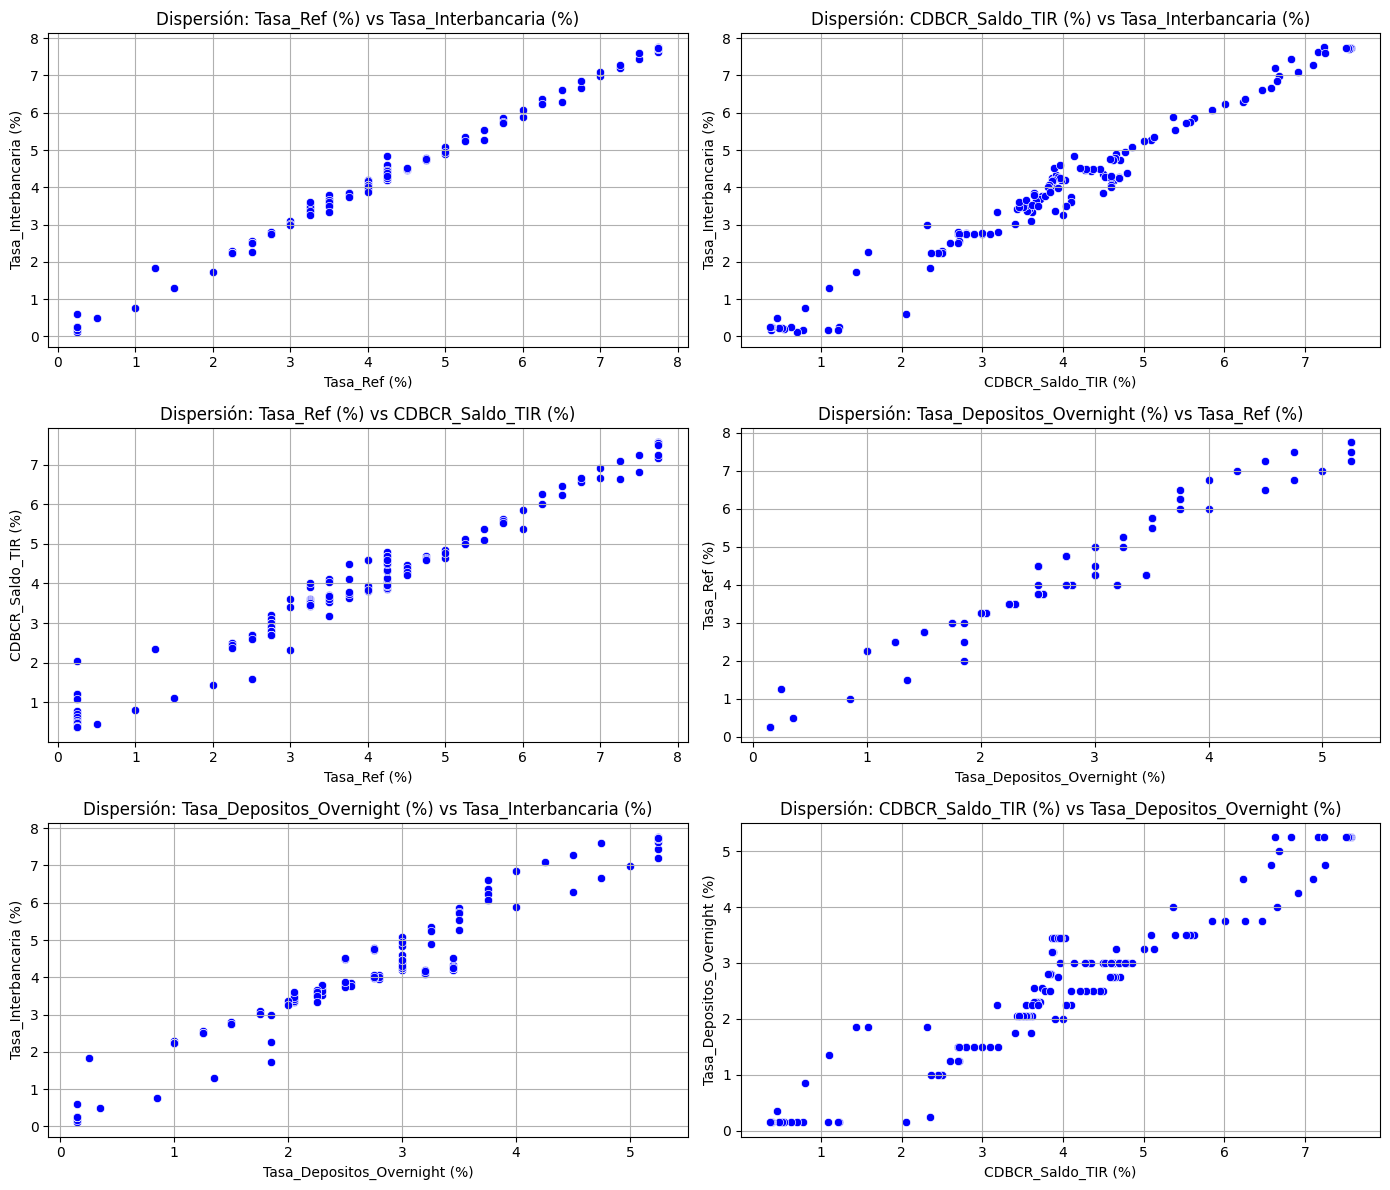

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de pares de variables con mayor correlación (sin duplicados y sin IPC)
pares_correlacionados = [
    ('Tasa_Ref (%)', 'Tasa_Interbancaria (%)'),
    ('CDBCR_Saldo_TIR (%)', 'Tasa_Interbancaria (%)'),
    ('Tasa_Ref (%)', 'CDBCR_Saldo_TIR (%)'),
    ('Tasa_Depositos_Overnight (%)', 'Tasa_Ref (%)'),
    ('Tasa_Depositos_Overnight (%)', 'Tasa_Interbancaria (%)'),
    ('CDBCR_Saldo_TIR (%)', 'Tasa_Depositos_Overnight (%)')
]

# Crear figura con subplots en formato 3x2
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()  # Aplanar para iterar fácilmente

# Crear gráficos de dispersión para cada par
for i, (var1, var2) in enumerate(pares_correlacionados):
    sns.scatterplot(x=df_bcrp[var1], y=df_bcrp[var2], color='blue', ax=axes[i])
    axes[i].set_title(f'Dispersión: {var1} vs {var2}', fontsize=12)
    axes[i].set_xlabel(var1, fontsize=10)
    axes[i].set_ylabel(var2, fontsize=10)
    axes[i].grid(True)

# Eliminar subplots vacíos (si hubiera)
for j in range(len(pares_correlacionados), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


1. Dispersión: Tasa de Referencia (%) vs Tasa Interbancaria (%)

El gráfico evidencia una relación casi lineal y positiva, lo que refleja que la Tasa Interbancaria sigue de cerca los movimientos de la Tasa de Referencia, cumpliendo el objetivo central del BCRP: alinear las condiciones del mercado monetario con su señal de política monetaria. Durante la pandemia de COVID-19 (2020), ambas tasas cayeron a mínimos históricos (alrededor de 0.25%–0.5%), mostrando la política altamente expansiva para estimular crédito y consumo. Posteriormente, en el periodo 2021–2023, ambas tasas subieron de manera sincronizada hasta superar el 7%, en un contexto de inflación importada por alimentos, combustibles y disrupciones globales, evidenciando la política contractiva para frenar el sobrecalentamiento y corregir expectativas inflacionarias.

2. Dispersión: CDBCR_Saldo_TIR (%) vs Tasa Interbancaria (%)

El gráfico muestra también una relación positiva y muy estrecha: cuando sube la Tasa de Interés de los CDBCR, la Tasa Interbancaria acompaña el movimiento. Esto confirma el papel de los Certificados de Depósito BCRP como instrumento clave de absorción de liquidez y de transmisión de la política monetaria hacia el mercado. En periodos de liquidez abundante (como el 2020), ambas tasas se ubicaron en niveles bajos, mientras que en la fase de endurecimiento (2021–2023) aumentaron de manera coordinada. Esto refleja que el BCRP no solo usa la tasa de referencia como guía, sino también instrumentos de mercado abierto (CDBCR) para reforzar su control sobre la liquidez y las expectativas inflacionarias.

3. Dispersión: Tasa de Referencia (%) vs CDBCR_Saldo_TIR (%)

Aquí se observa una correlación casi perfecta, evidenciando que las tasas de los CDBCR están directamente determinadas por la Tasa de Referencia. Esto se explica por la teoría de política monetaria: el BCRP subasta los CDBCR ajustando sus tasas al nivel de referencia, de modo que el sistema financiero internalice la señal de política. En el periodo 2020, ambas tasas estuvieron en mínimos (expansión monetaria), mientras que tras el shock inflacionario global (2021–2023) ambas se elevaron, reforzando la transmisión de la política. Esto muestra cómo el BCRP utiliza el mercado de valores como canal operativo para llevar su postura de política al sistema financiero.

4. Dispersión: Tasa Depósitos Overnight (%) vs Tasa de Referencia (%)

El gráfico confirma que la Tasa de Depósitos Overnight sigue de manera estrecha la evolución de la Tasa de Referencia, ya que este instrumento es la tasa que remunera los excesos de liquidez de los bancos depositados en el BCRP. Durante el COVID-19, ambas cayeron drásticamente, reflejando la intención del BCRP de abaratar el costo de oportunidad de mantener liquidez y fomentar crédito. En la fase 2021–2023, el alza de la tasa de referencia se transmitió automáticamente a los depósitos overnight, mostrando cómo las condiciones de liquidez bancaria se ajustan casi instantáneamente a los cambios de política monetaria. Esto refuerza el papel de la tasa de referencia como ancla de corto plazo en la economía.

5. Dispersión: Tasa Depósitos Overnight (%) vs Tasa Interbancaria (%)

El gráfico muestra un ajuste casi lineal, confirmando que tanto la tasa interbancaria como la de depósitos overnight responden simultáneamente a la política monetaria. Cuando el BCRP inyecta liquidez (ej. 2020), ambas tasas convergen a valores muy bajos, facilitando financiamiento barato en el mercado. Cuando el BCRP absorbe liquidez y endurece política (2021–2023), ambas suben en sincronía, reflejando un encarecimiento generalizado del crédito. Esto confirma que la política monetaria afecta tanto a las operaciones de corto plazo entre bancos (interbancaria) como a los incentivos de los bancos para mantener liquidez en el BCRP (overnight), dos canales esenciales de transmisión hacia la economía real.

6. Dispersión: CDBCR_Saldo_TIR (%) vs Tasa Depósitos Overnight (%)

Este gráfico revela una relación igualmente positiva, ya que ambas variables responden de manera directa a los movimientos de la Tasa de Referencia. Los CDBCR (que absorben liquidez a plazos más largos) y los depósitos overnight (exceso de liquidez inmediata) son complementarios en la caja de herramientas del BCRP. En épocas de expansión (COVID-19), ambas tasas estuvieron deprimidas, lo que significó liquidez barata y abundante. En cambio, en el ciclo de alza de tasas 2021–2023, ambas se elevaron, mostrando cómo el BCRP buscó controlar tanto la liquidez inmediata como las expectativas a plazos más largos. Esto refuerza la idea de que la política monetaria del BCRP opera a través de múltiples canales de transmisión, todos alineados con el objetivo de controlar la inflación.